<a href="https://colab.research.google.com/github/chefdarek/DS-Unit-2-Regression-1/blob/master/making_forecasts_assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab  import files
files.upload()


Saving aipageviews.csv to aipageviews (2).csv


{'aipageviews.csv': b'Date,"Artificial intelligence"\n2015-07-01,5055\n2015-07-02,5083\n2015-07-03,4252\n2015-07-04,4250\n2015-07-05,4328\n2015-07-06,4944\n2015-07-07,4813\n2015-07-08,4731\n2015-07-09,4765\n2015-07-10,4181\n2015-07-11,3632\n2015-07-12,3818\n2015-07-13,5113\n2015-07-14,9890\n2015-07-15,5262\n2015-07-16,4417\n2015-07-17,4311\n2015-07-18,3904\n2015-07-19,4260\n2015-07-20,5138\n2015-07-21,5196\n2015-07-22,5500\n2015-07-23,4905\n2015-07-24,4265\n2015-07-25,3720\n2015-07-26,4299\n2015-07-27,5581\n2015-07-28,6422\n2015-07-29,5805\n2015-07-30,5079\n2015-07-31,5116\n2015-08-01,3973\n2015-08-02,4461\n2015-08-03,5017\n2015-08-04,4842\n2015-08-05,4974\n2015-08-06,5283\n2015-08-07,4487\n2015-08-08,3884\n2015-08-09,5019\n2015-08-10,5296\n2015-08-11,5443\n2015-08-12,5177\n2015-08-13,5068\n2015-08-14,4383\n2015-08-15,4026\n2015-08-16,4463\n2015-08-17,5145\n2015-08-18,4966\n2015-08-19,5320\n2015-08-20,5085\n2015-08-21,5160\n2015-08-22,4422\n2015-08-23,4758\n2015-08-24,5316\n2015-08-25,

In [2]:
import pandas as pd
df = pd.read_csv('aipageviews.csv')
df.shape

(1426, 2)

In [3]:
df.head()

,Date,Artificial intelligence
0,2015-07-01,5055
1,2015-07-02,5083
2,2015-07-03,4252
3,2015-07-04,4250
4,2015-07-05,4328


In [4]:
df.tail()

,Date,Artificial intelligence
1421,2019-05-22,10116
1422,2019-05-23,9478
1423,2019-05-24,9871
1424,2019-05-25,6875
1425,2019-05-26,7865


In [0]:
df['Date'] = pd.to_datetime(df['Date'])
df = df.set_index('Date')

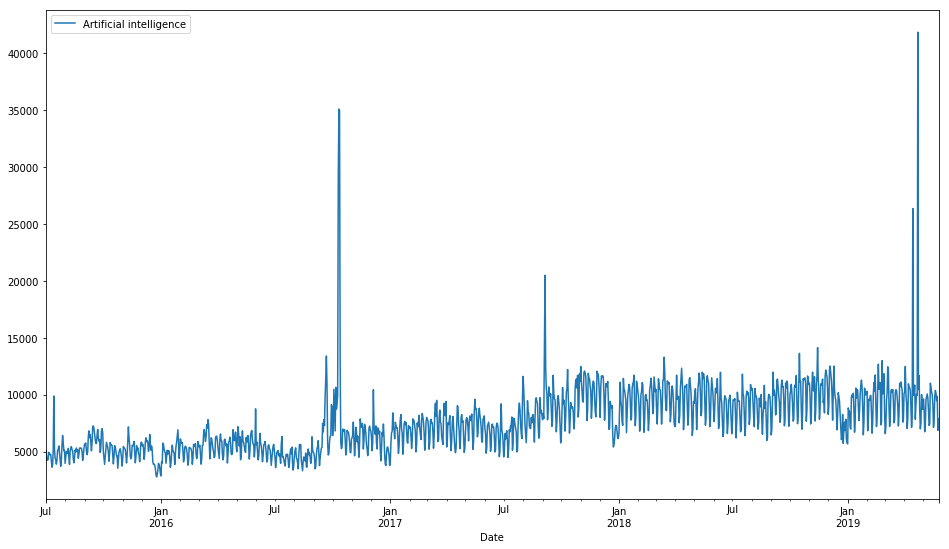

In [6]:
df.plot(figsize=(16,9));

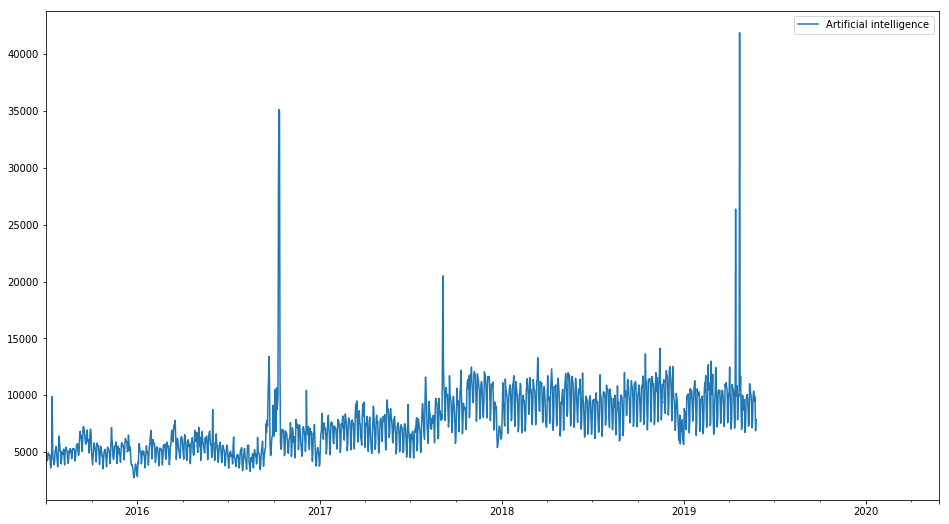

In [7]:
#add in dates to end of df to get empty space for prediction
df = df.reindex(pd.date_range(start='2015-07-01', end='2020-05-26'))
df.plot(figsize=(16,9));


In [8]:
#average method of forecasting
#How to take the average rate of change and apply to previous days???
df['Artificial intelligence'].mean()

7593.9039270687235

In [0]:
df['Mean Baseline'] = df['Artificial intelligence'].mean()

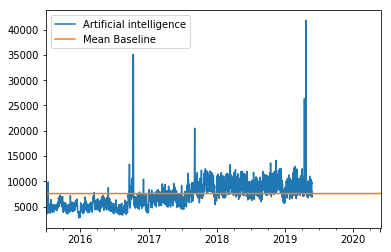

In [10]:
df.plot();

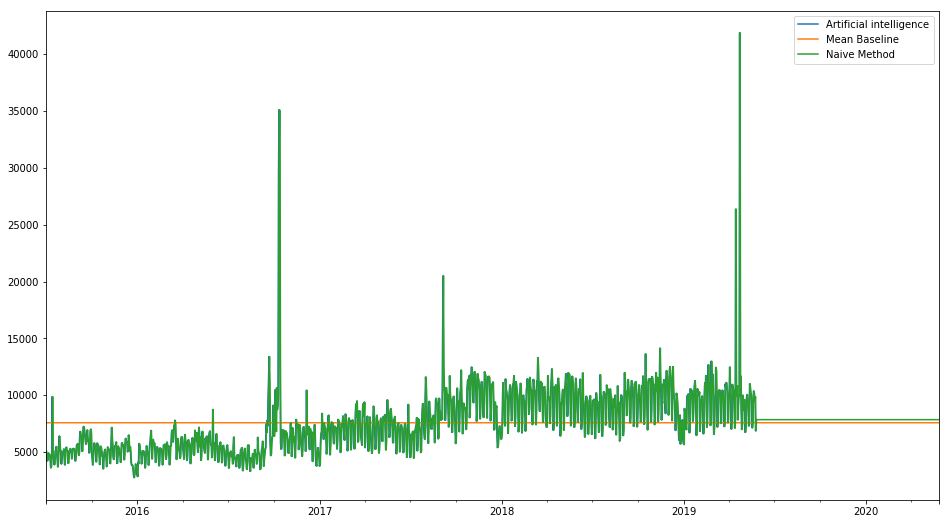

In [11]:
#naive method(last observation)
#shifts number by one day and fills from the last day a flat line
df['Naive Method'] = df['Artificial intelligence'].shift(1).ffill()
df.plot(figsize=(16,9));

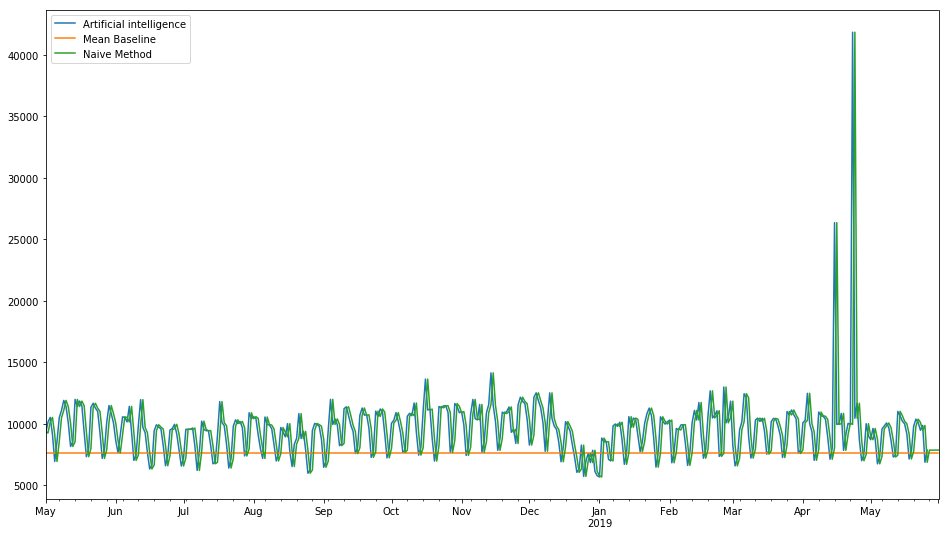

In [12]:
df['2018-05':'2019-05'].plot(figsize=(16,9));

In [0]:
import matplotlib.pyplot as plt

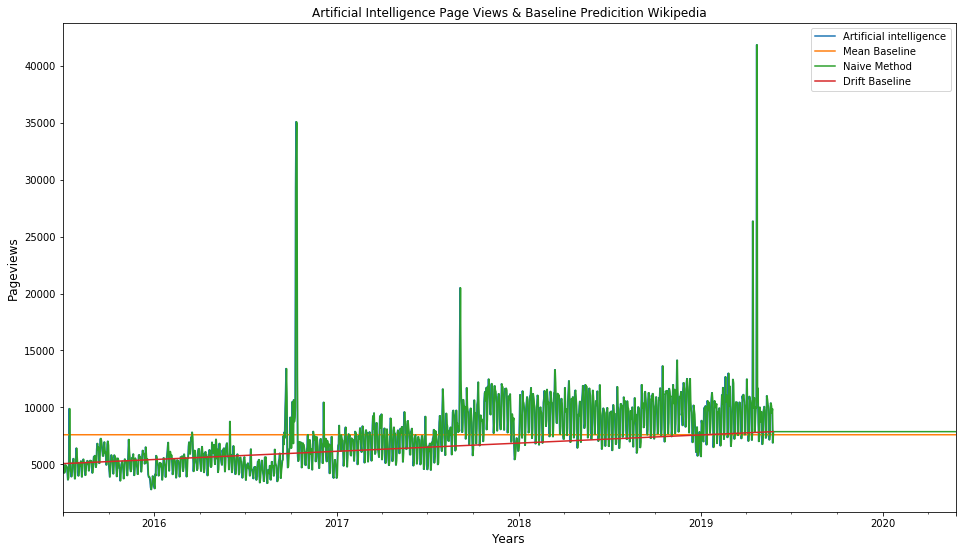

In [15]:
#Drift Method makes a straight line from first observation to last observation;
#doesnt show monthly or daily change just a general line that you could extend
#to the future
import numpy as np
df['Drift Baseline'] = np.nan
df.loc['2015-07-01', 'Drift Baseline'] = df.loc['2015-07-01', 'Artificial intelligence']
df.loc['2019-05-26', 'Drift Baseline'] = df.loc['2019-05-26', 'Artificial intelligence']
df['Drift Baseline'] = df['Drift Baseline'].interpolate(limit_area='inside')
df.plot(figsize=(16,9));
plt.title('Artificial Intelligence Page Views & Baseline Predicition Wikipedia');
plt.xlabel('Years', fontsize=12)
plt.ylabel('Pageviews', fontsize=12);

In [0]:
df = df.reset_index().rename(columns={'index': 'ds', 'Artificial intelligence': 'y'})

In [17]:
from fbprophet import Prophet
m = Prophet()
m.fit(df)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [18]:
future = m.make_future_dataframe(periods=365)
future.tail()

,ds
2152,2021-05-22
2153,2021-05-23
2154,2021-05-24
2155,2021-05-25
2156,2021-05-26


In [0]:
import matplotlib.pyplot as plt

In [0]:
forecast = m.predict(future)

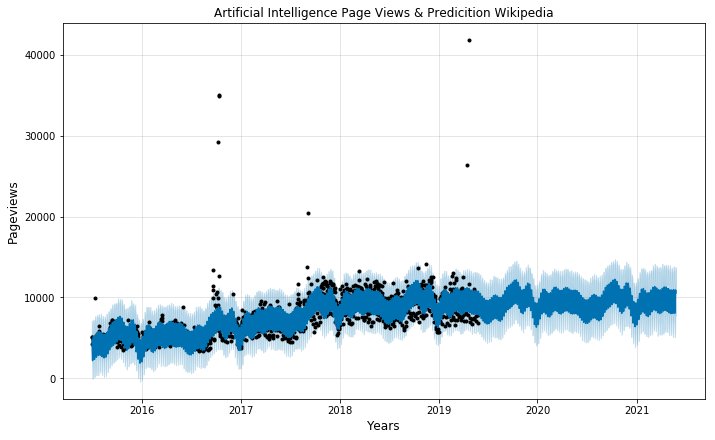

In [21]:
#make predictive plot over matplot base
fig1 = m.plot(forecast);
plt.title('Artificial Intelligence Page Views & Predicition Wikipedia');
plt.xlabel('Years', fontsize=12)
plt.ylabel('Pageviews', fontsize=12);

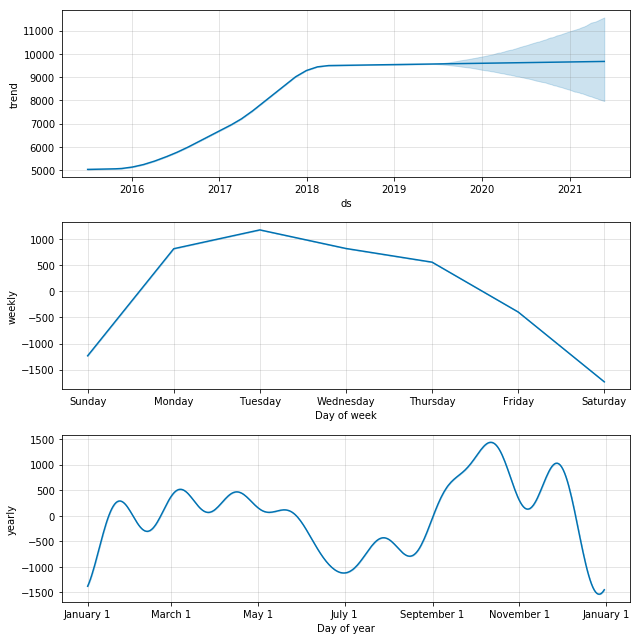

In [22]:
fig2 = m.plot_components(forecast)

In [23]:
help(Prophet.fit)

Help on function fit in module fbprophet.forecaster:

fit(self, df, **kwargs)
    Fit the Prophet model.
    
    This sets self.params to contain the fitted model parameters. It is a
    dictionary parameter names as keys and the following items:
        k (Mx1 array): M posterior samples of the initial slope.
        m (Mx1 array): The initial intercept.
        delta (MxN array): The slope change at each of N changepoints.
        beta (MxK matrix): Coefficients for K seasonality features.
        sigma_obs (Mx1 array): Noise level.
    Note that M=1 if MAP estimation.
    
    Parameters
    ----------
    df: pd.DataFrame containing the history. Must have columns ds (date
        type) and y, the time series. If self.growth is 'logistic', then
        df must also have a column cap that specifies the capacity at
        each ds.
    kwargs: Additional arguments passed to the optimizing or sampling
        functions in Stan.
    
    Returns
    -------
    The fitted Prophet objec